**Data Visualisation**

In [16]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import warnings
import plotly.express as px
px_template = "simple_white"


%matplotlib inline

In [17]:
data = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv', sep = "," , encoding = 'utf-8')
data.shape


(58478, 22)

In [18]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 58478 rows and 22 columns.


In [19]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


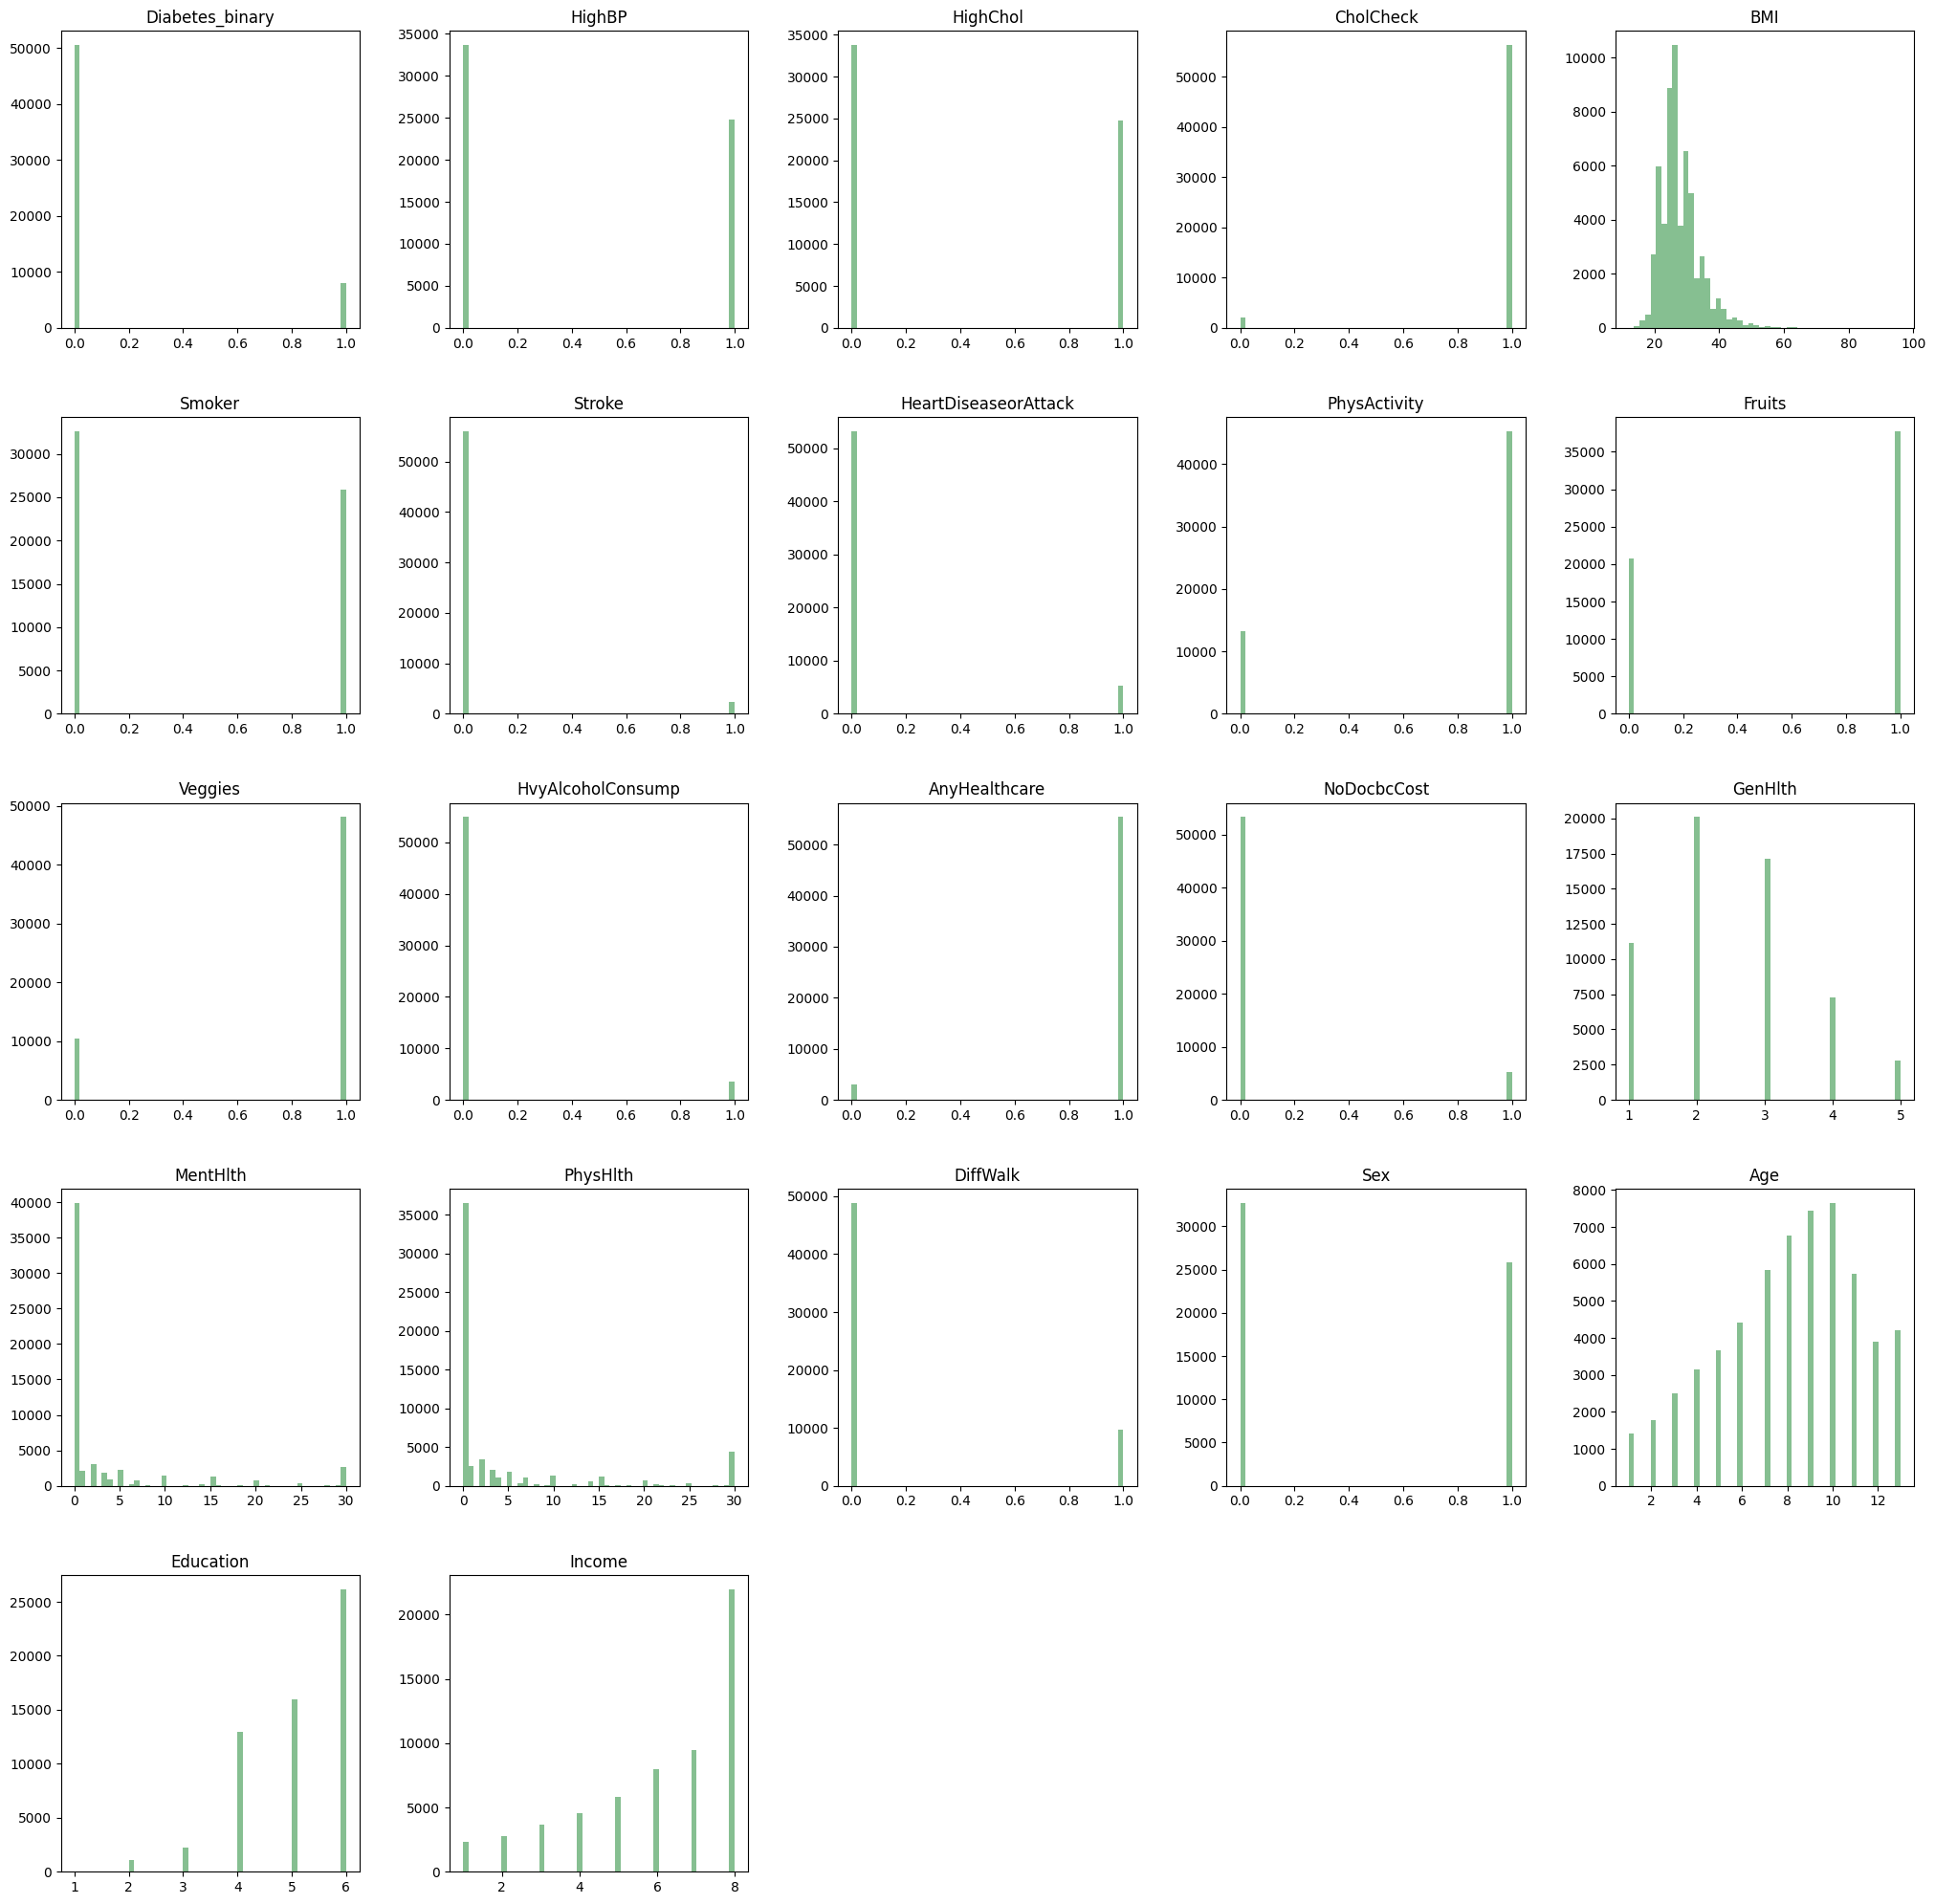

In [20]:
ax = data.hist(bins=50, grid=False, figsize=(25,25), color='#86bf91')

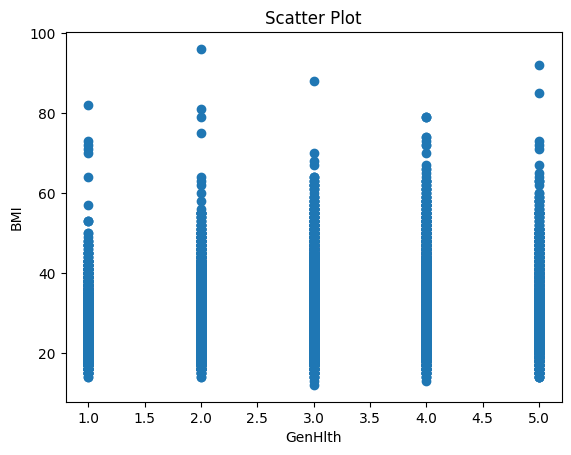

In [21]:
plt.scatter(data['GenHlth'], data['BMI'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('GenHlth')
plt.ylabel('BMI')
plt.show()

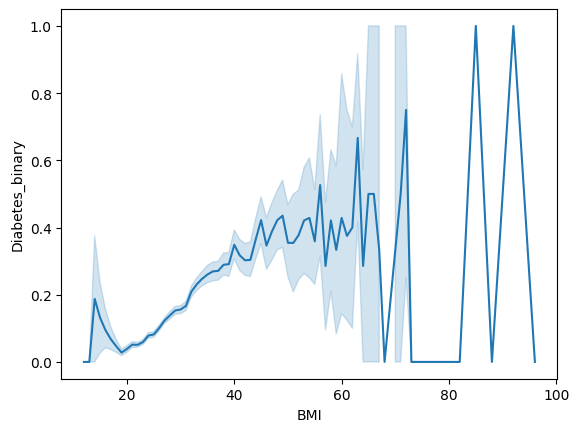

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# LINE PLOT

sns.lineplot(x='BMI', y='Diabetes_binary', data=data)
plt.show()

<Axes: title={'center': 'Correlation with Diabetes Prediction'}>

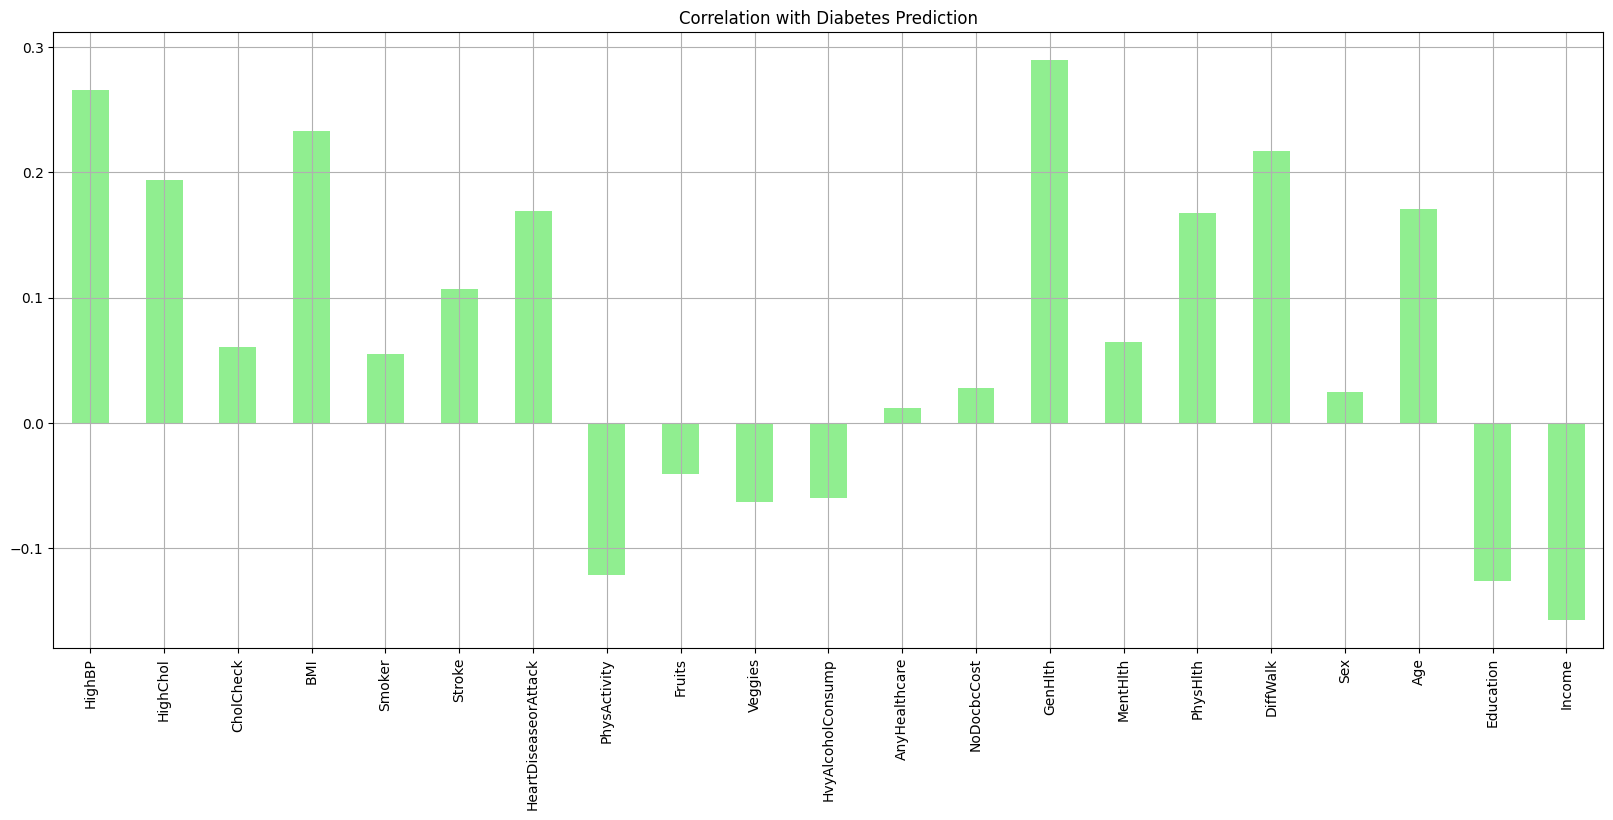

In [23]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes Prediction", color='lightgreen')


**visualizing the value count of Diabetes_binary using countplot**

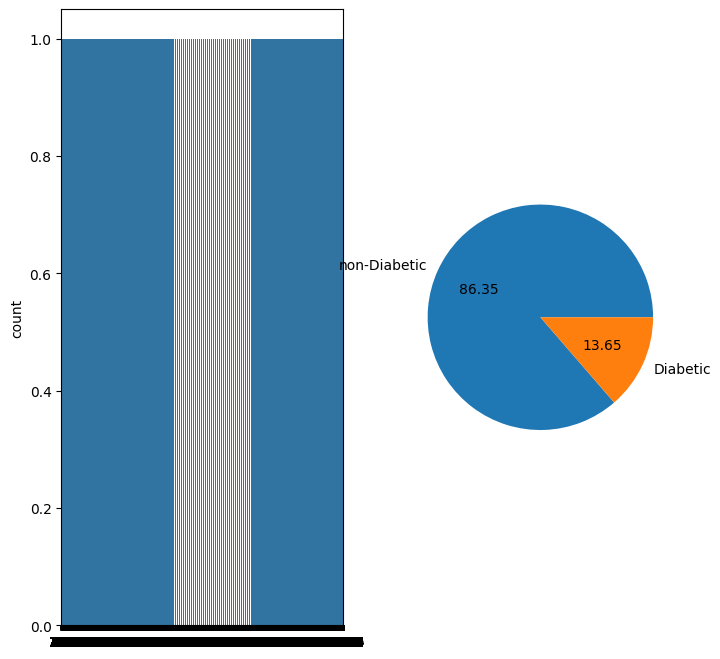

In [24]:

figure1, plot1 = plt.subplots(1,2,figsize=(8,8))

sns.countplot(data['Diabetes_binary'],ax=plot1[0])


#checking the average number of diabetic and non diabetic pepole average by plotting a pie chart

labels=["non-Diabetic","Diabetic"]

plt.pie(data["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );


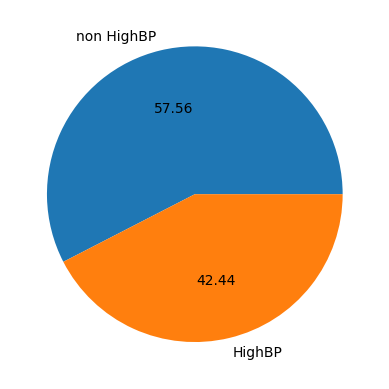

In [25]:
labels=["non HighBP","HighBP"]

plt.pie(data["HighBP"].value_counts() , labels =labels ,autopct='%.02f' );

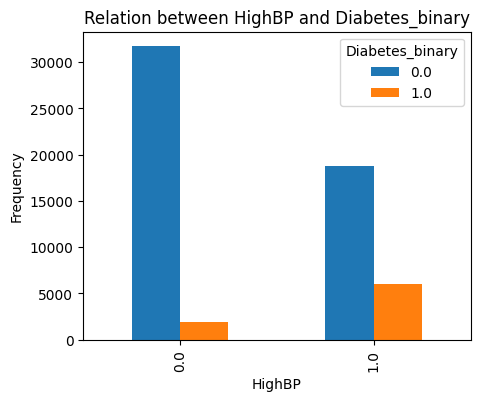

In [26]:
pd.crosstab(data.HighBP, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between HighBP and Diabetes_binary')
plt.xlabel("HighBP")
plt.ylabel('Frequency')
plt.show()


**relation of HighChol with Diabetes_binary**

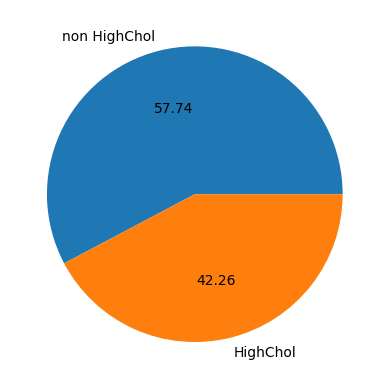

In [27]:
labels=["non HighChol", "HighChol"]

plt.pie(data["HighChol"].value_counts() , labels =labels ,autopct='%.02f' );

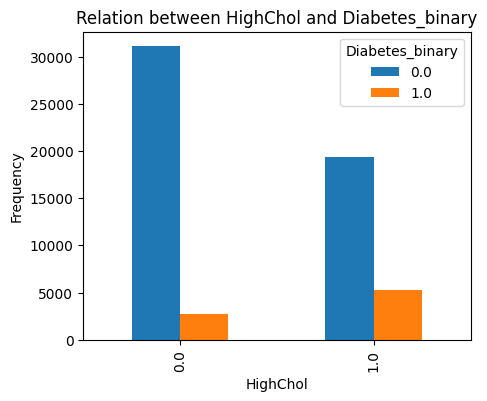

In [28]:
pd.crosstab(data.HighChol, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between HighChol and Diabetes_binary')
plt.xlabel("HighChol")
plt.ylabel('Frequency')
plt.show()

**checking HighBP and HighChol's combined effect on Diabetes_binary**

In [29]:
(data.groupby(["HighBP" , "HighChol"])["Diabetes_binary"].value_counts()/data.groupby(["HighBP" , "HighChol"])["Diabetes_binary"].count())*100


HighBP  HighChol  Diabetes_binary
0.0     0.0       0.0                96.028285
                  1.0                 3.971715
        1.0       0.0                89.853629
                  1.0                10.146371
1.0     0.0       0.0                82.799724
                  1.0                17.200276
        1.0       0.0                70.839299
                  1.0                29.160701
dtype: float64

**visualizing the above result**

Text(0.5, 1.0, 'Relation b/w HighBP ,HighChol and Diabetes')

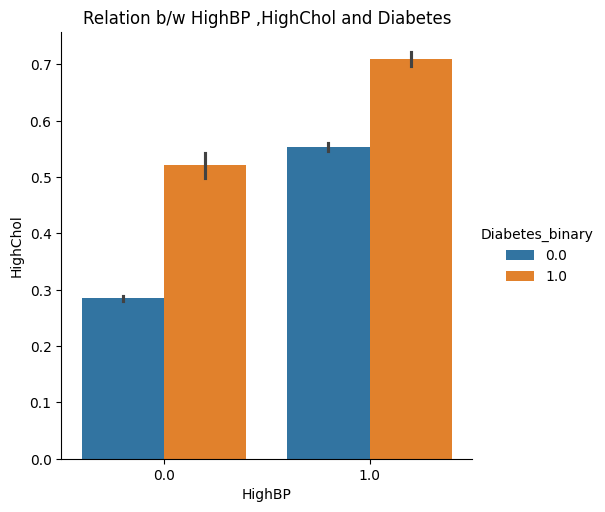

In [30]:

sns.catplot(x="HighBP" , y ="HighChol" , data = data , hue="Diabetes_binary" , kind="bar" );
plt.title("Relation b/w HighBP ,HighChol and Diabetes")


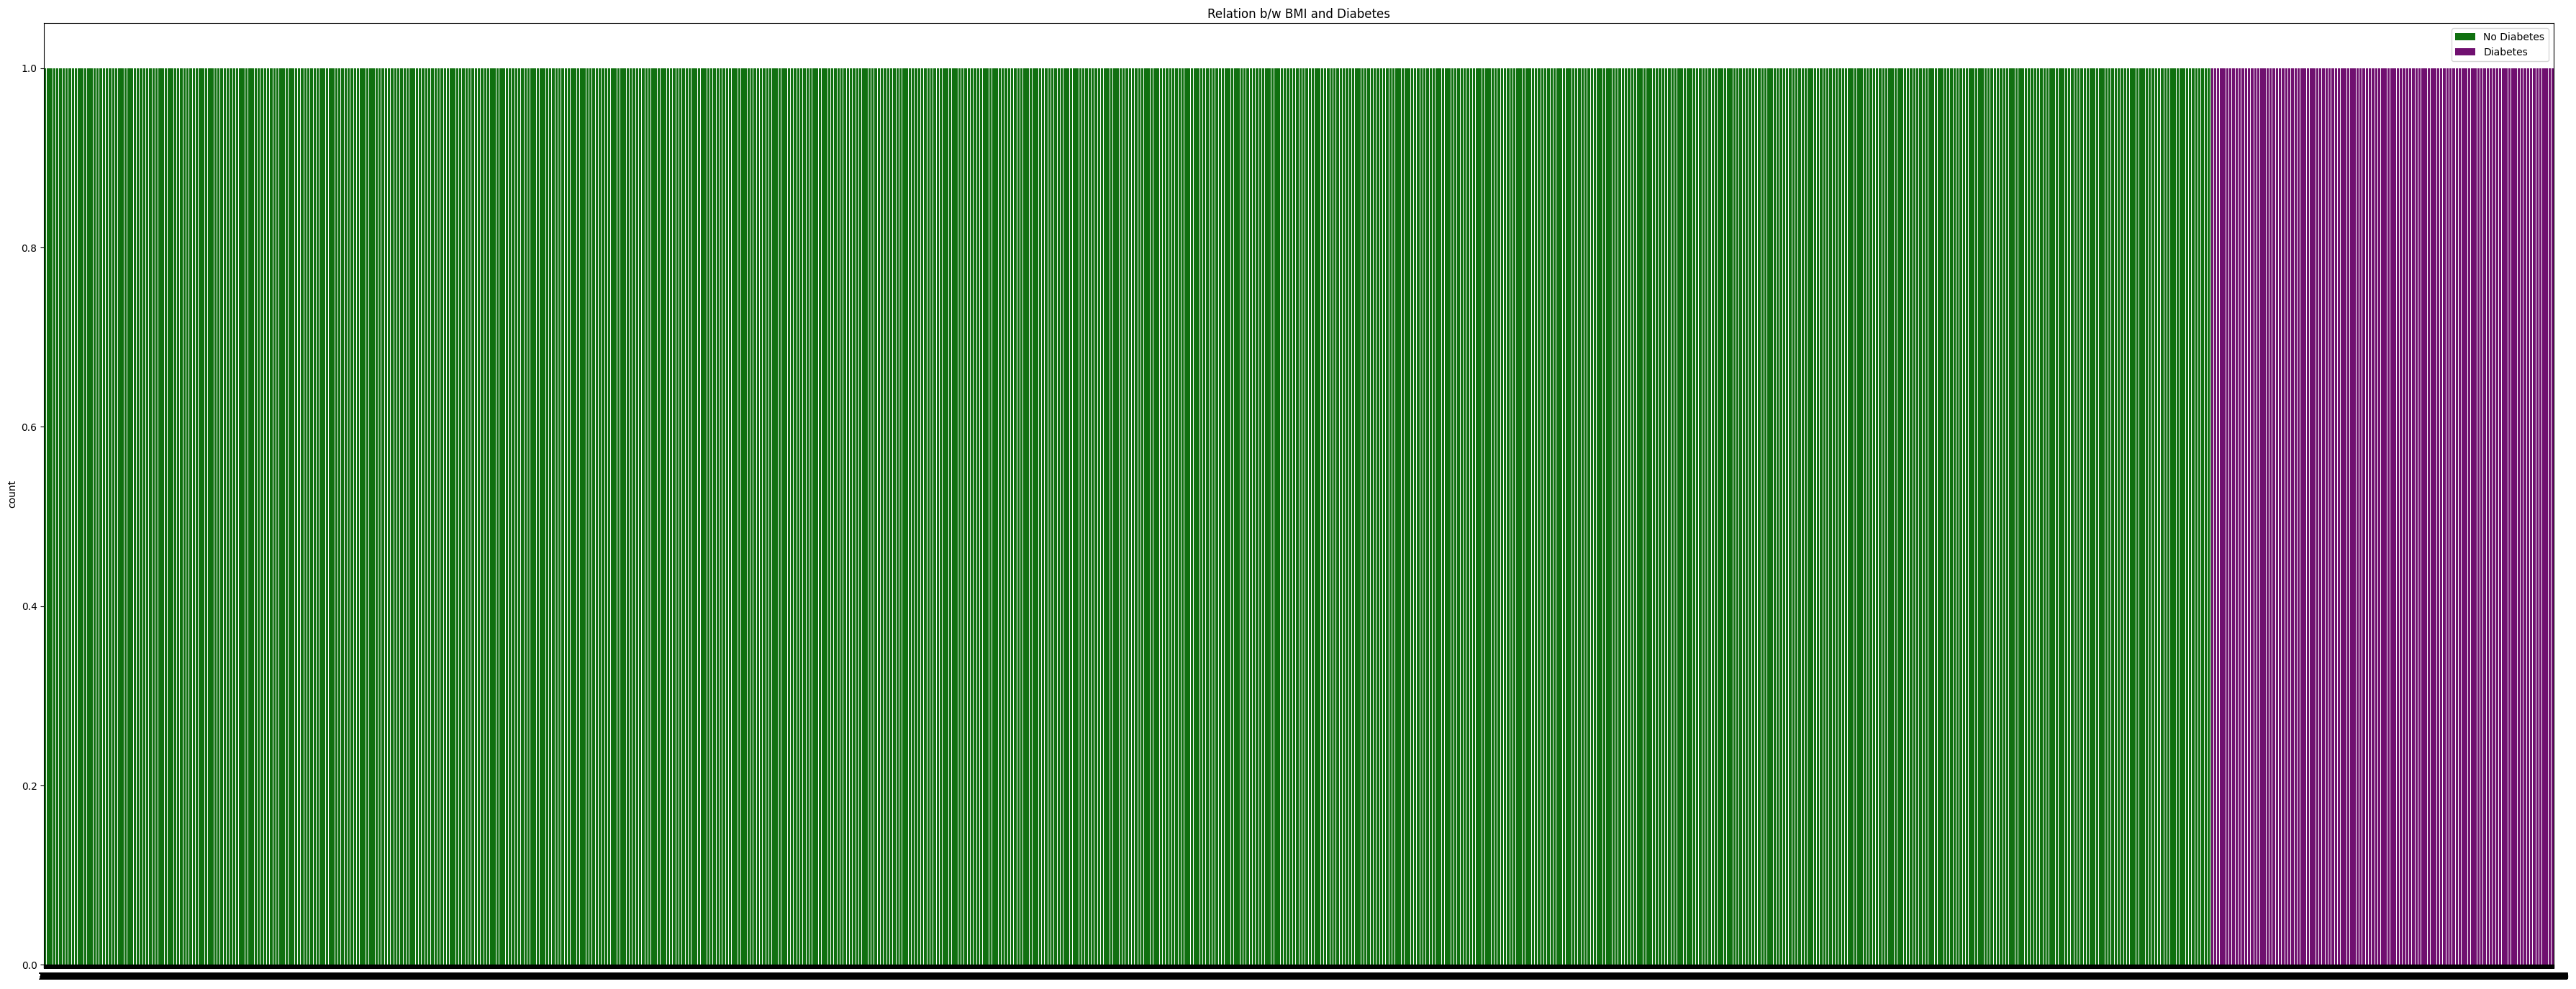

In [31]:
plt.figure(figsize=(45, 17))
warnings.filterwarnings('ignore')
sns.countplot(data.BMI[data.Diabetes_binary == 0], color="green", label="No Diabetes")
sns.countplot(data.BMI[data.Diabetes_binary == 1], color="purple", label="Diabetes" )
plt.title("Relation b/w BMI and Diabetes")
plt.legend()

**relation of Smoker with Diabetes_binary**

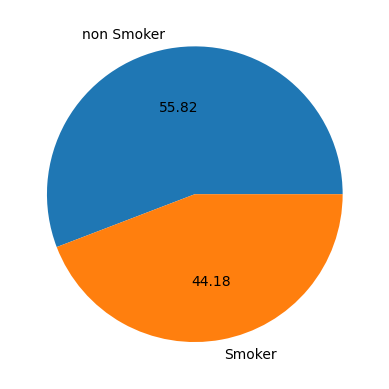

In [32]:
labels=["non Smoker","Smoker"]

plt.pie(data["Smoker"].value_counts() , labels =labels ,autopct='%.02f' );


In [33]:
pd.crosstab(data.Smoker, data.Diabetes_binary)


Diabetes_binary,0.0,1.0
Smoker,,
0.0,28733,3909
1.0,21765,4071


**checking the relation between Smoker and Diabetes_binary**

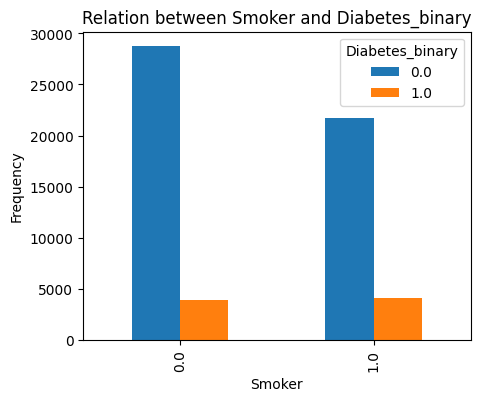

In [34]:

pd.crosstab(data.Smoker, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between Smoker and Diabetes_binary')
plt.xlabel("Smoker")
plt.ylabel('Frequency')
plt.show()



**Conclusion**

According to this data, smoking does play a significant role in determining whether a patient is diabetic or not.

**relation of HvyAlcoholConsump with Diabetes_binary**

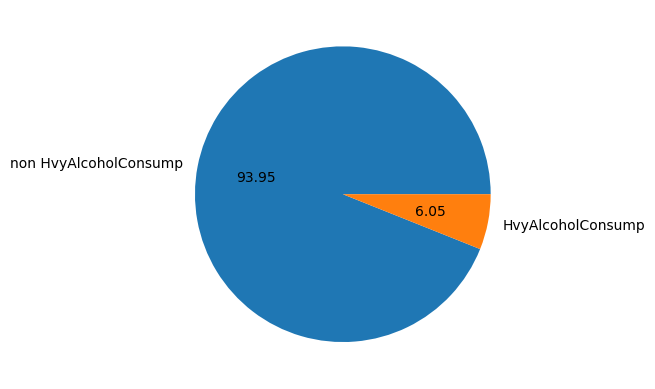

In [35]:

labels=["non HvyAlcoholConsump","HvyAlcoholConsump"]

plt.pie(data["HvyAlcoholConsump"].value_counts() , labels =labels ,autopct='%.02f' );


**checking the number of diabetic people who consume HvyAlcohol and who do not consume HvyAlcohol**

In [36]:
pd.crosstab(data.HvyAlcoholConsump, data.Diabetes_binary)


Diabetes_binary,0.0,1.0
HvyAlcoholConsump,,
0.0,47155,7784
1.0,3343,196


**checking the relation between HvyAlcoholConsump and Diabetes_binary**

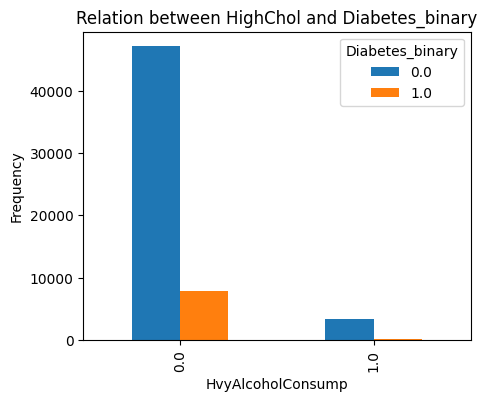

In [37]:

pd.crosstab(data.HvyAlcoholConsump, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between HighChol and Diabetes_binary')
plt.xlabel("HvyAlcoholConsump")
plt.ylabel('Frequency')
plt.show()

**Conclusion**


The data doesn't have unequal proportions of diabetic patients and non-diabetic patients who consume and do not consume HvyAlcohol. Therefore, we cannot really predict the effect of HvyAlcoholConsump on Diabetic_binary

**checking Smoker and HvyAlcoholConsump's combined effect on Diabetes_binary**


In [38]:
(data.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].value_counts()/data.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].count())*100


Smoker  HvyAlcoholConsump  Diabetes_binary
0.0     0.0                0.0                87.694759
                           1.0                12.305241
        1.0                0.0                96.260939
                           1.0                 3.739061
1.0     0.0                0.0                83.348900
                           1.0                16.651100
        1.0                0.0                93.470640
                           1.0                 6.529360
dtype: float64

**visualizing the above result**

Text(0.5, 1.0, 'Relation b/w Smoker ,HvyAlcoholConsump and Diabetes')

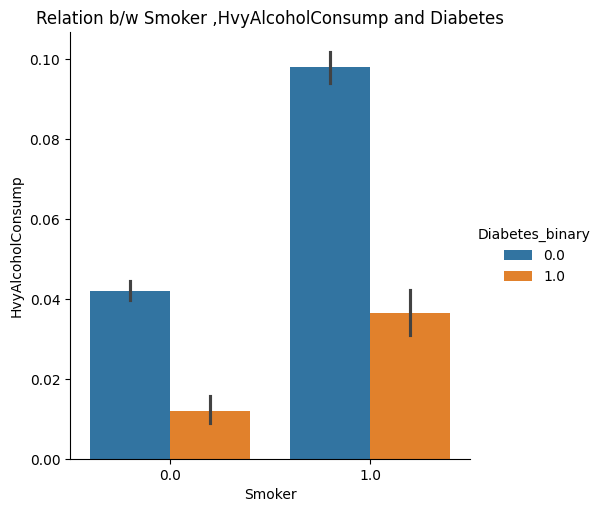

In [39]:
sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = data , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes")


In [40]:
(data.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].value_counts()/data.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].count())*100


Stroke  HeartDiseaseorAttack  Diabetes_binary
0.0     0.0                   0.0                88.552143
                              1.0                11.447857
        1.0                   0.0                70.004615
                              1.0                29.995385
1.0     0.0                   0.0                75.492773
                              1.0                24.507227
        1.0                   0.0                57.734205
                              1.0                42.265795
dtype: float64

**visualizing the above result**

Text(0.5, 1.0, 'Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes')

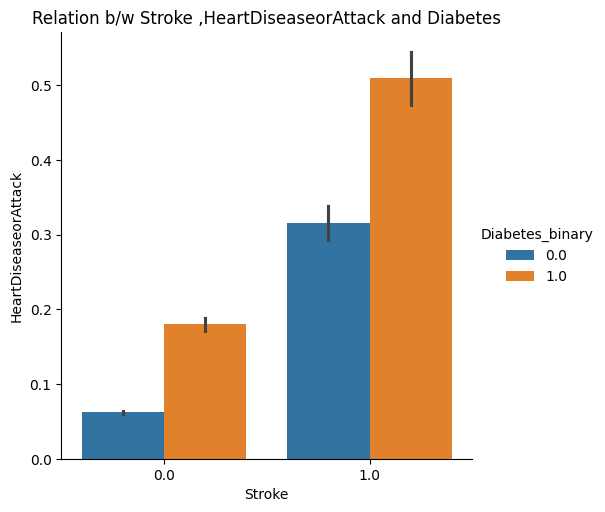

In [41]:
sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = data , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes")

**relation of PhysActivity with Diabetes_binary**

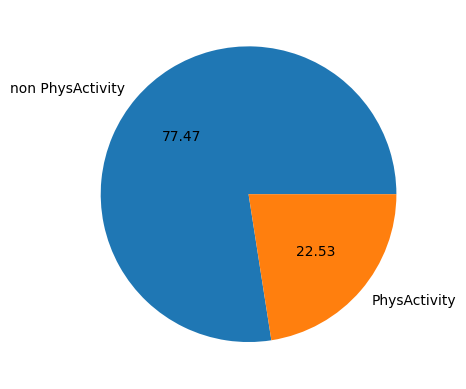

In [42]:
labels=["non PhysActivity","PhysActivity"]
plt.pie(data["PhysActivity"].value_counts() , labels =labels ,autopct='%.02f' );


**checking the number of diabetic people with PhysActivity and without PhysActivity**

In [43]:
pd.crosstab(data.PhysActivity, data.Diabetes_binary)


Diabetes_binary,0.0,1.0
PhysActivity,,
0.0,10359,2818
1.0,40139,5162


**checking the relation between PhysActivity and Diabetes_binary**

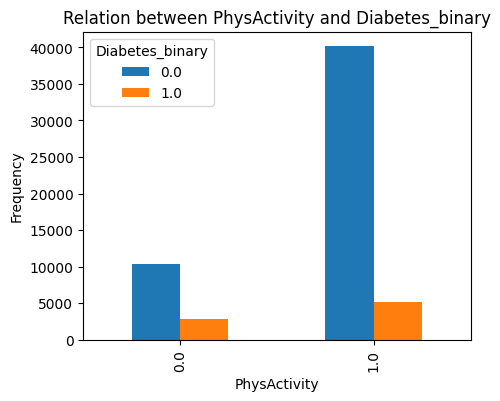

In [44]:
pd.crosstab(data.PhysActivity, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))
plt.title('Relation between PhysActivity and Diabetes_binary')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

relation of Fruits with Diabetes_binary

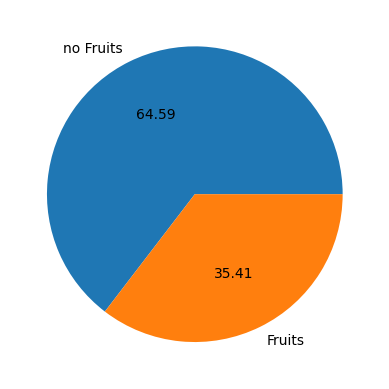

In [45]:
labels=["no Fruits","Fruits"]

plt.pie(data["Fruits"].value_counts() , labels =labels ,autopct='%.02f' );


**checking the number of diabetic people who consume Fruits and who do not**

In [46]:
pd.crosstab(data.Fruits, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Fruits,,
0.0,17486,3219
1.0,33012,4761


**checking the relation between Fruits and Diabetes_binary**

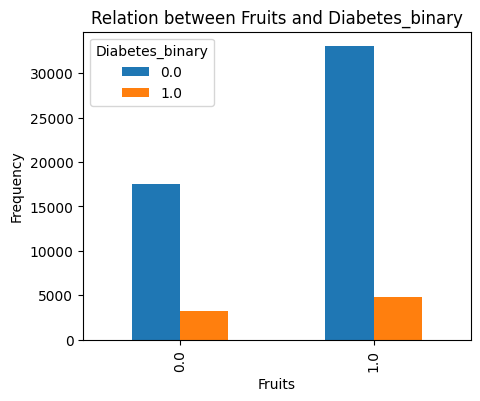

In [47]:
pd.crosstab(data.Fruits, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between Fruits and Diabetes_binary')
plt.xlabel("Fruits")
plt.ylabel('Frequency')
plt.show()

**relation of Veggies intake with Diabetes_binary**

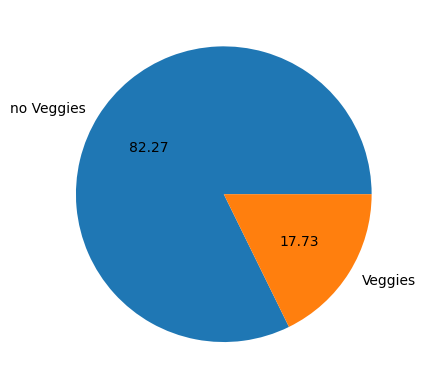

In [48]:
labels=["no Veggies","Veggies"]

plt.pie(data["Veggies"].value_counts() , labels =labels ,autopct='%.02f' );

**checking the number of diabetic people who consume Veggies and who do not**

In [49]:
pd.crosstab(data.Veggies, data.Diabetes_binary)


Diabetes_binary,0.0,1.0
Veggies,,
0.0,8468,1902
1.0,42030,6078


checking the relation between Veggies and Diabetes_binary

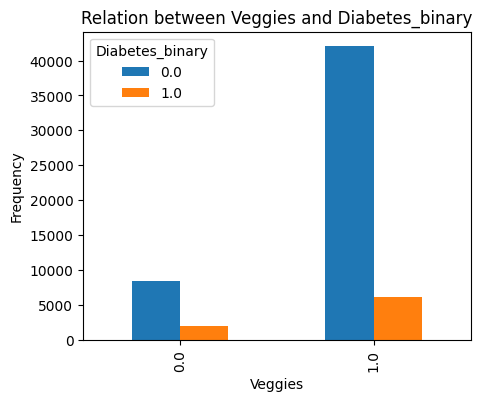

In [50]:

pd.crosstab(data.Veggies, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between Veggies and Diabetes_binary')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

**understanding the health status of the respondants of the survey, by analyzing the effect of GenHlth , MentHlth , PhysHlth and DiffWalk on Diabetes_binary**

Q: Would you say that in general your health is

1: Excellent
2: Very good
3: Good
4: Fair
5: Poor

**GenHlth vs Diabetes_binary**

In [51]:
pd.crosstab(data.GenHlth, data.Diabetes_binary)


Diabetes_binary,0.0,1.0
GenHlth,,
1.0,10866,296
2.0,18621,1475
3.0,14196,2945
4.0,5066,2204
5.0,1749,1060


**relation of MentHlth with Diabetes_binary**

Q: Thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?

**MentHlth vs Diabetes_binary**

In [56]:
pd.crosstab(data.MentHlth, data.Diabetes_binary).T


MentHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
0.0,34651,1880,2673,1631,797,1958,195,676,117,16,...,50,13,9,6,239,8,11,78,35,2104
1.0,5232,198,348,241,116,288,36,92,25,4,...,12,1,4,4,67,2,1,14,6,608


**viualizing the above result using distplot**

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

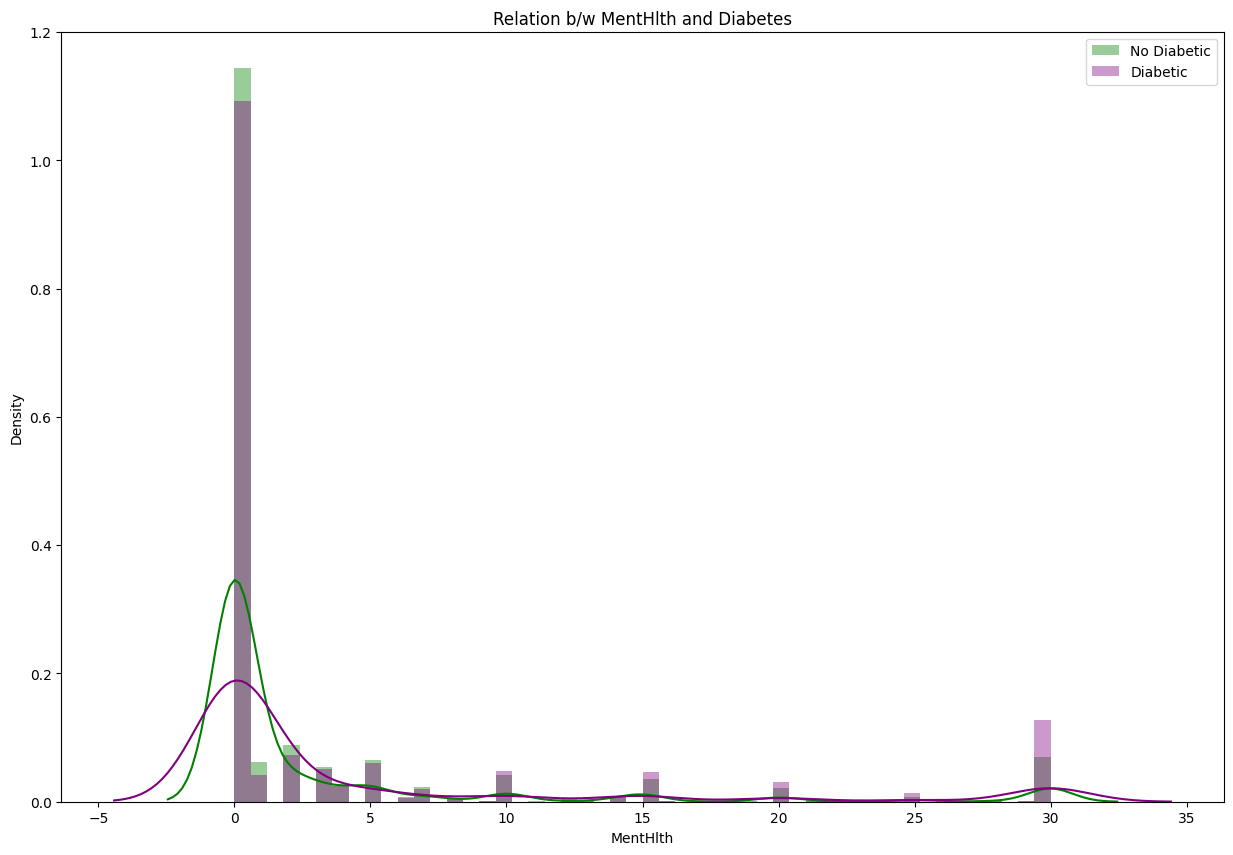

In [57]:
plt.figure(figsize=(15, 10))
warnings.filterwarnings('ignore')

sns.distplot(data.MentHlth[data.Diabetes_binary == 0], color="green", label="No Diabetic" )
sns.distplot(data.MentHlth[data.Diabetes_binary == 1], color="purple", label="Diabetic" )
plt.title("Relation b/w MentHlth and Diabetes")

plt.legend()


**Conclusion**

Mostly, the non diabetic patients have a better physical health

**relation of DiffWalk with Diabetes_binary**

Q: Do you have serious difficulty walking or climbing stairs?

1: Yes, 0: No

**Diffwalk vs Diabetes_binary**

In [58]:
pd.crosstab(data.DiffWalk, data.Diabetes_binary).T


DiffWalk,0.0,1.0
Diabetes_binary,,
0.0,43781,6717
1.0,5043,2937


**checking the relation between DiffWalk and Diabetes_binary**

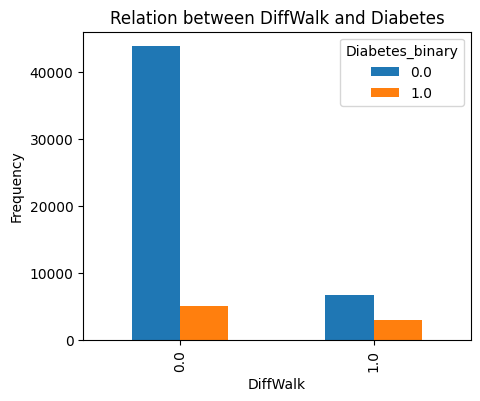

In [59]:
pd.crosstab(data.DiffWalk, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between DiffWalk and Diabetes')
plt.xlabel("DiffWalk")
plt.ylabel('Frequency')
plt.show()

In [60]:
pd.crosstab(data.Sex, data.Diabetes_binary)


Diabetes_binary,0.0,1.0
Sex,,
0.0,28478,4215
1.0,22020,3765


**checking the relation b/w Sex and Diabetes**

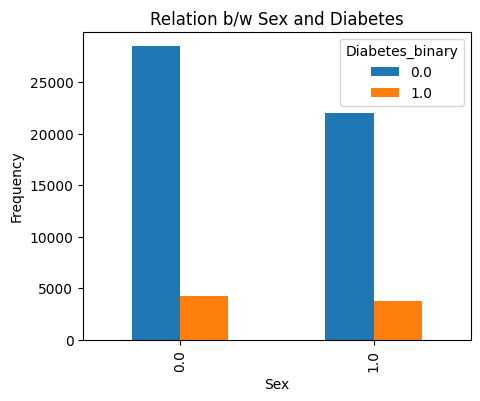

In [61]:
pd.crosstab(data.Sex, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation b/w Sex and Diabetes')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.show()

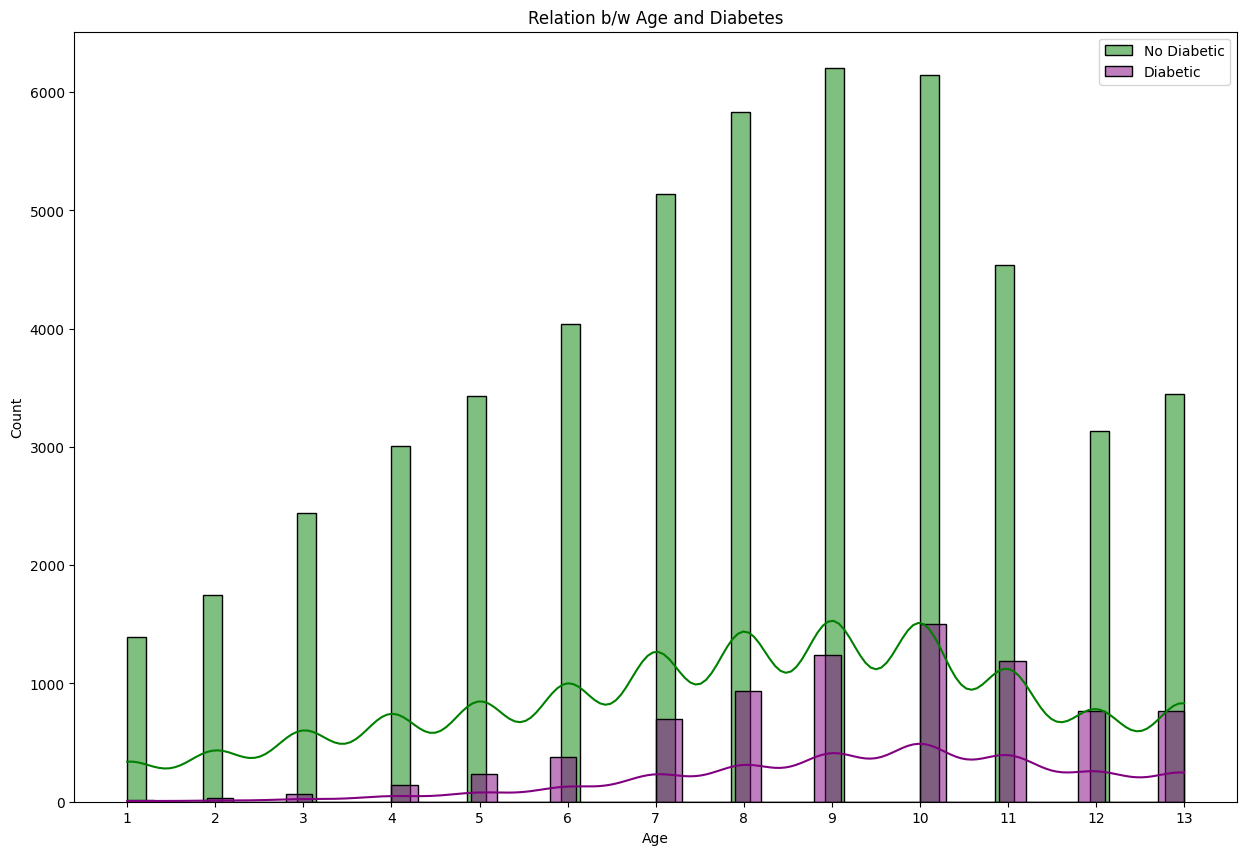

In [62]:

plt.figure(figsize=(15, 10))
sns.histplot(data.Age[data.Diabetes_binary == 0], color="green", label="No Diabetic" , kde = True )
sns.histplot(data.Age[data.Diabetes_binary == 1], color="purple", label="Diabetic" , kde = True )
plt.title("Relation b/w Age and Diabetes")

plt.xticks(data["Age"].unique())
plt.legend()


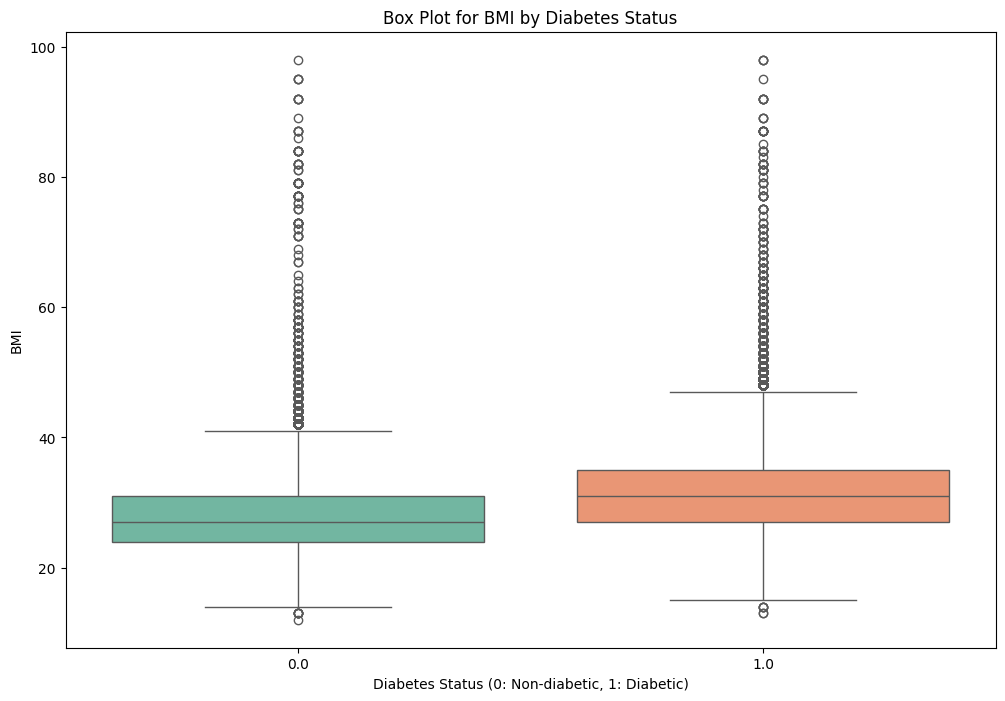

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/kuchbhi-kunal/nidan/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
df = pd.read_csv(url)

# Set the figure size
plt.figure(figsize=(12, 8))

# Box plot for BMI by Diabetes Status
sns.boxplot(x='Diabetes_binary', y='BMI', data=df, palette='Set2')

# Set plot title and labels
plt.title('Box Plot for BMI by Diabetes Status')
plt.xlabel('Diabetes Status (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('BMI')

# Show the plot
plt.show()

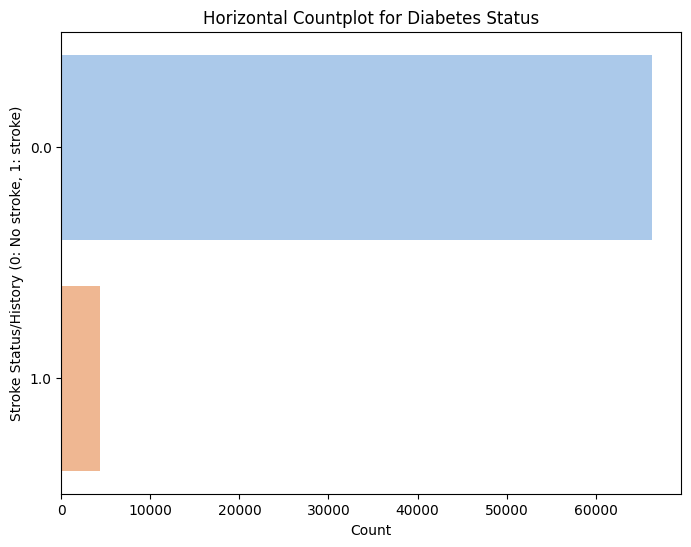

In [64]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Horizontal Countplot for Diabetes_binary
sns.countplot(y='Stroke', data=df, palette='pastel')

# Set plot title and labels
plt.title('Horizontal Countplot for Diabetes Status')
plt.xlabel('Count')
plt.ylabel('Stroke Status/History (0: No stroke, 1: stroke)')

# Show the plot
plt.show()